Tutorial 3 - Basic plotting

In Tutorial 2, we made use of PyBaMM's automatic plotting function when comparing models. This gave a good quick overview of many of the key variables in the model. However, by passing in just a few arguments it is easy to plot any of the many other variables that may be of interest to you. We start by building and solving a model as before:

In [1]:
import pybamm

model = pybamm.lithium_ion.DFN()
sim = pybamm.Simulation(model)
sim.solve([0, 3600])

c:\Users\RamonSchindler\miniconda3\envs\pybamm_env\lib\site-packages\pybamm\simulation.py:120: UserWarning: The default solver changed to IDAKLUSolver after the v25.4.0. release. You can swap back to the previous default by using `pybamm.CasadiSolver()` instead.
  self._solver = solver or self._model.default_solver


There are many more variables available from PyBaMM models than those in the default plots. One can see a full list of the available variables by just calling the variable_names method:

In [2]:
model.variable_names()

['Time [s]',
 'Time [min]',
 'Time [h]',
 'x [m]',
 'x_n [m]',
 'x_s [m]',
 'x_p [m]',
 'r_n [m]',
 'r_p [m]',
 'Current variable [A]',
 'Total current density [A.m-2]',
 'Current [A]',
 'C-rate',
 'Discharge capacity [A.h]',
 'Throughput capacity [A.h]',
 'Discharge energy [W.h]',
 'Throughput energy [W.h]',
 'Porosity',
 'Negative electrode porosity',
 'X-averaged negative electrode porosity',
 'Separator porosity',
 'X-averaged separator porosity',
 'Positive electrode porosity',
 'X-averaged positive electrode porosity',
 'Porosity change',
 'Negative electrode porosity change [s-1]',
 'X-averaged negative electrode porosity change [s-1]',
 'Separator porosity change [s-1]',
 'X-averaged separator porosity change [s-1]',
 'Positive electrode porosity change [s-1]',
 'X-averaged positive electrode porosity change [s-1]',
 'Negative electrode interface utilisation variable',
 'X-averaged negative electrode interface utilisation variable',
 'Negative electrode interface utilisation',


As a first example, we choose to plot only electrolyte concentration and voltage. We assemble a list of the variable names to plot and then pass this list to the plot method of our simulation as the output_variables keyword argument:

In [3]:
output_variables = ["Electrolyte concentration [mol.m-3]", "Voltage [V]"]
sim.plot(output_variables=output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

Note that, if we want to plot only a single variable, we still need to pass it as a list:

In [4]:
output_variables = ["Voltage [V]"]
sim.plot(output_variables=output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

You can also plot multiple variables on the same plot by nesting lists. For example, if we want to plot electrode and electrolyte current densities in the same plot and voltage next to them, we can write:

In [5]:
sim.plot(
    [
        ["Electrode current density [A.m-2]", "Electrolyte current density [A.m-2]"],
        "Voltage [V]",
    ]
)

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

PyBaMM also allows you to produce a voltage plot showing the contribution of the various overpotentials and losses by calling the plot_votage_components method and passing the solution object of the simulation as argument:

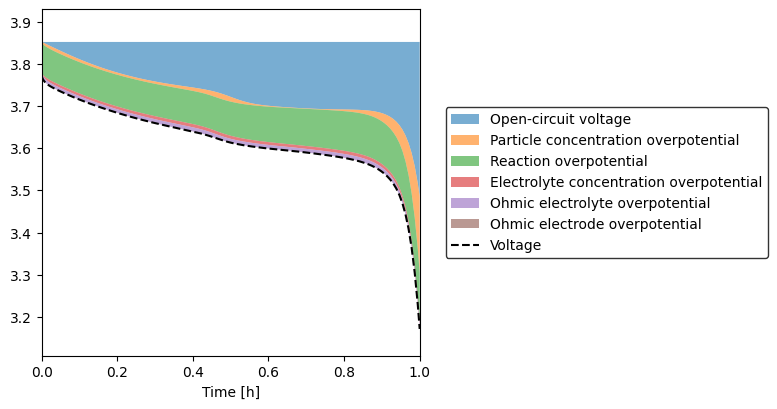

(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='Time [h]'>)

In [6]:
sim.plot_voltage_components()

The contributions can also be split by electrode by setting the keyword argument split_by_electrode to True:

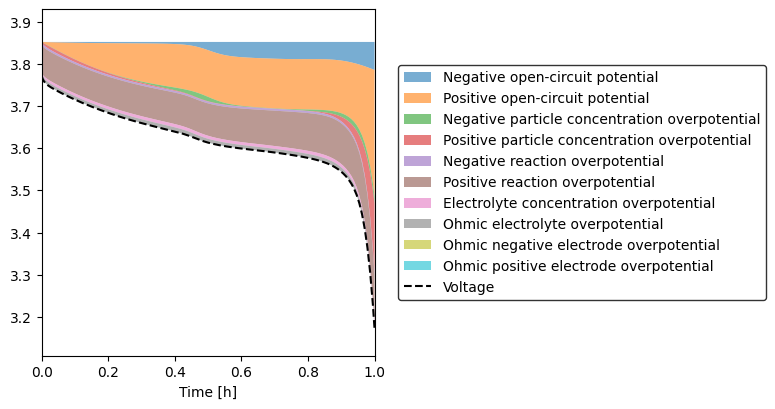

(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='Time [h]'>)

In [7]:
sim.plot_voltage_components(split_by_electrode=True)